In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import pandas as pd


In [2]:
z=[-10.00,-7.89,-5.78,-3.68,-1.57,0.53,2.63,4.74,6.84,8.95,11.05,13.16,15.26,17.37,19.47,21.58,23.68,25.79,27.89,30.00]
W=[311.2,311.5,307.2,307.8,301.9,303.1,307.4,310.5,303.4,294.5,296.1,303.5,311.3,314.4,317.6,313.0,317.9,338.0,337.2,343.2]

In [19]:
df = pd.read_csv('data1.csv')
df.Breite /= 2
df["100mmLinse"] /= 2
df

,Abstand,Breite,100mmLinse
0,0.0,278.5,202.0
1,1.5,287.5,170.0
2,3.0,296.5,142.5
3,4.5,303.5,117.0
4,6.0,313.0,102.0
5,7.5,325.0,87.5
6,9.0,333.0,90.0
7,10.5,344.0,112.5
8,12.0,353.5,142.0
9,13.5,363.5,173.5


In [23]:
def w_fitfunction(z,w0, z0,c):
    zR=np.pi*w0/c
    zI=z+z0
    return np.sqrt(w0**2+zI**2/zR**2)

# popt, pcov=curve_fit(w_fitfunction, df.Abstand, df["100mmLinse"], absolute_sigma='false')
popt, pcov=curve_fit(w_fitfunction, df.Abstand, df.Breite, absolute_sigma='false')

xfunk=np.arange(0,15,0.1)



w0 ist 220.4438620306694, z0 ist 19.33352918367653, der Divergenzwinkel theta ist 11.40215321974387.


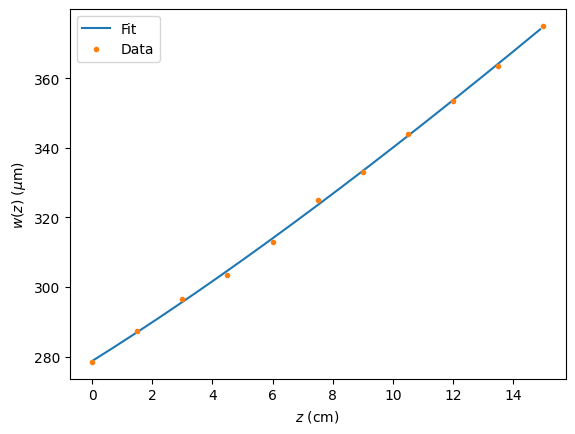

In [24]:
print(f"w0 ist {popt[0]}, z0 ist {popt[1]}, der Divergenzwinkel theta ist {popt[0]/popt[1]}.")
plt.plot(xfunk, w_fitfunction(xfunk, *popt), label='Fit')
# plt.plot(df.Abstand, df["100mmLinse"], linestyle='', marker='.', label='Data')
plt.plot(df.Abstand, df.Breite, linestyle='', marker='.', label='Data')
# plt.plot(xfunk, w_fitfunction(xfunk, 300), label='Fit')
plt.legend()
plt.xlabel("$z$ (cm)")
plt.ylabel('$w(z)$ ($\mu$m)')
plt.show()

In [6]:
df2 = pd.read_csv('T0001ALL.CSV', skiprows=15)
df2.columns = ["t", "CH1", "temp", "CH2", "temp2"]

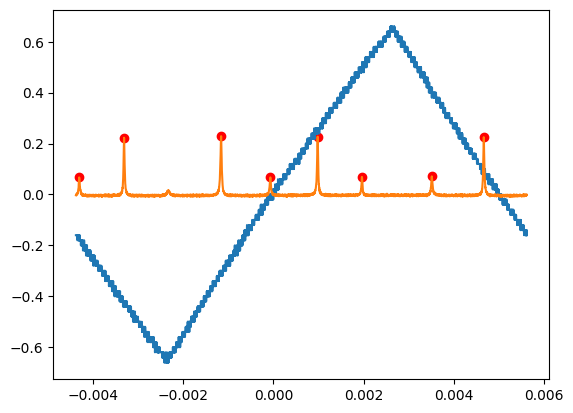

568
0


In [13]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(df2.CH2, height=0.05)

plt.plot(df2.t, df2.CH1)
plt.plot(df2.t, df2.CH2)
plt.scatter(df2.t[peaks], df2.CH2[peaks], c='r')
plt.show()

print(peaks[3] - peaks[2])
print(peaks[4] - peaks[4])

In [16]:
print(peaks[3] - peaks[2])
print(peaks[4] - peaks[3])
print(peaks[5] - peaks[4])

568
547
511
